In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [2]:
files = glob('../results/????.csv')

In [3]:
print("Fount files")
for file in files:
    print(file)

Fount files
../results\8210.csv
../results\8211.csv
../results\8212.csv
../results\8214.csv
../results\8216.csv
../results\8220.csv
../results\8221.csv
../results\8222.csv
../results\8223.csv
../results\8226.csv
../results\8228.csv
../results\8230.csv
../results\8232.csv
../results\8233.csv
../results\8236.csv


In [4]:
dfs = [pd.read_csv(f, index_col=None) for f in files]

In [5]:
df = pd.concat(dfs, axis=0, join='inner', ignore_index=True)

In [6]:
df = df.sort_values('mean_sbil')

In [7]:
df = df[df.ntracks_time > 30000]

In [8]:
# fills = sorted(list(set(df['fill'].values)))

# for fill in fills:
#     plt.plot(df[df['fill']==fill].t1, df[df['fill']==fill]['mean_sbil'], '.')
#     # plt.scatter(df[df['fill']==fill]['mean_sbil'], df[df['fill']==fill]['ntracks_time'], s=markers)

# figure = plt.gcf()
# figure.set_size_inches(16,10)
# plt.legend(fills, loc=2, fontsize=legend_font)
# plt.grid()
# # plt.xlabel("SBIL (Hz/$\mu$b)", fontsize=label_font)
# # plt.ylabel("Number of tracks found", fontsize=label_font)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)

# # plt.savefig('ntracks_vs_SBIL.png', dpi=600)

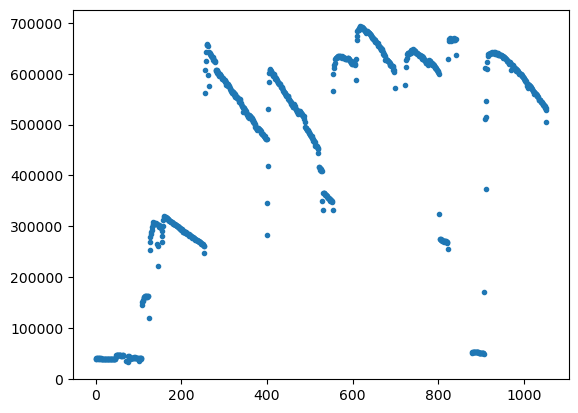

In [9]:
plt.plot(df.ntracks_time, '.')

In [10]:
markers = 30
legend_font = 15
label_font = 20

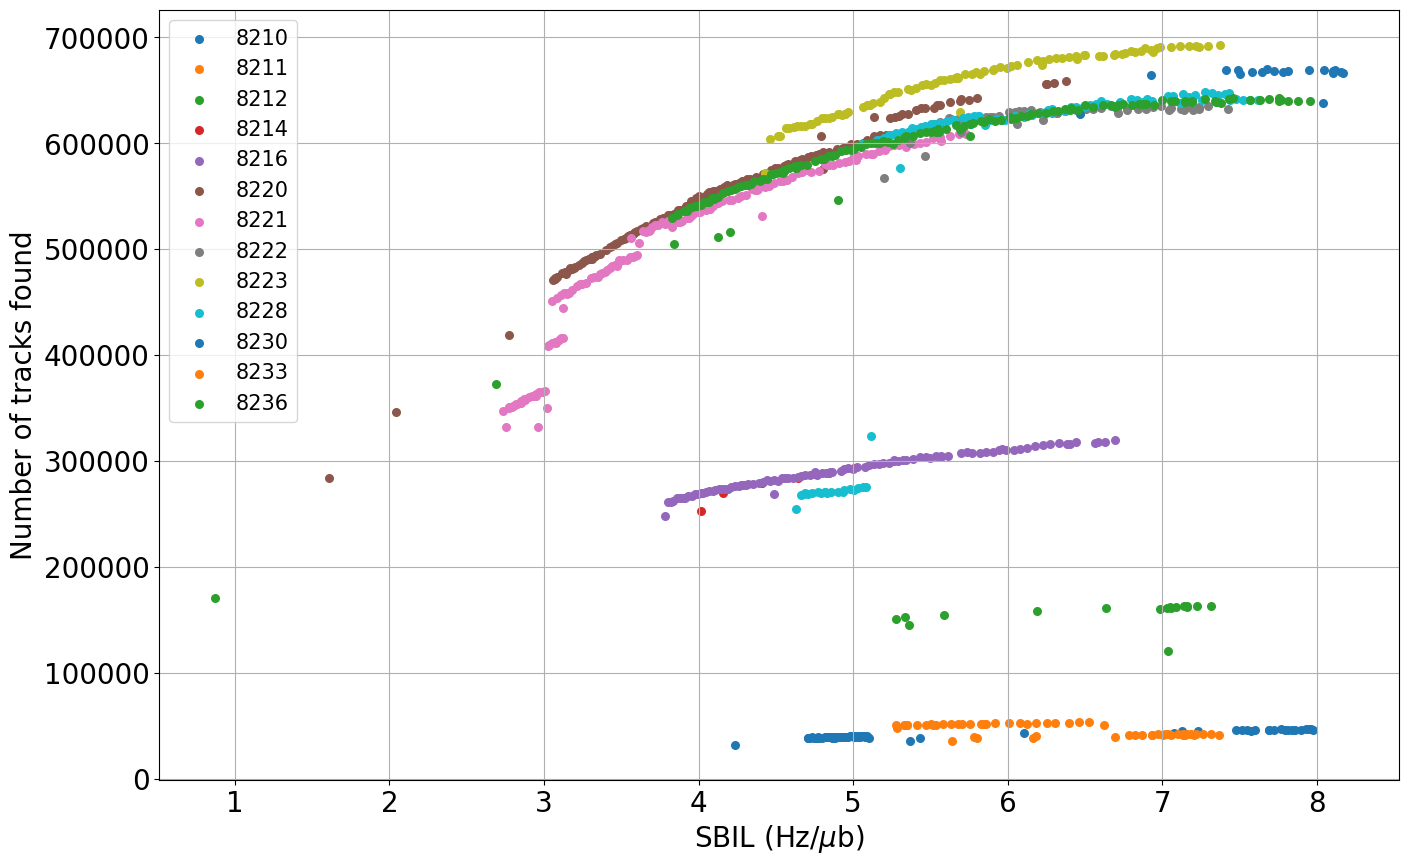

In [11]:
fills = sorted(list(set(df['fill'].values)))

for fill in fills:
    plt.scatter(df[df['fill']==fill]['mean_sbil'], df[df['fill']==fill]['ntracks_time'], s=markers)

figure = plt.gcf()
figure.set_size_inches(16,10)
plt.legend(fills, loc=2, fontsize=legend_font)
plt.grid()
plt.xlabel("SBIL (Hz/$\mu$b)", fontsize=label_font)
plt.ylabel("Number of tracks found", fontsize=label_font)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('ntracks_vs_SBIL.png', dpi=600)

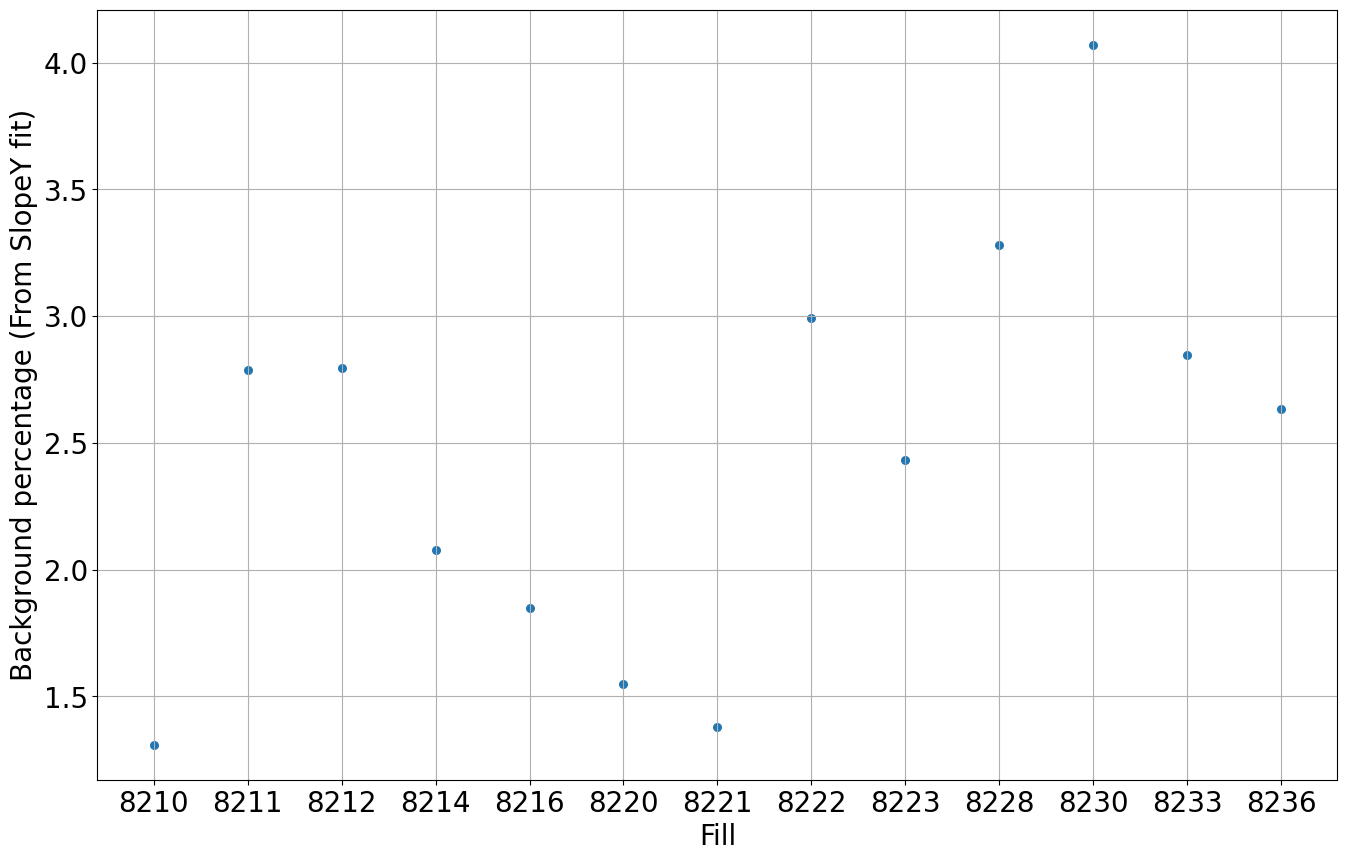

In [12]:
fills = sorted(list(set(df['fill'].values)))
mean_f = []

for fill in fills:
    mean_f.append(df[df['fill']==fill]['fSlopeY(%)'].mean())

fills = [str(x) for x in fills]
plt.scatter(fills, mean_f, s=markers)
    #plt.plot(df[df['fill']==fill]['mean_sbil'], df[df['fill']==fill]['fSlopeY(%)'], '-')

figure = plt.gcf()
figure.set_size_inches(16,10)
plt.grid()
plt.xlabel("Fill", fontsize=label_font)
plt.ylabel("Background percentage (From SlopeY fit)", fontsize=label_font)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('f_vs_fill.png', dpi=600)

C:\Users\nimmi\miniconda3\envs\pltpy\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\nimmi\miniconda3\envs\pltpy\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


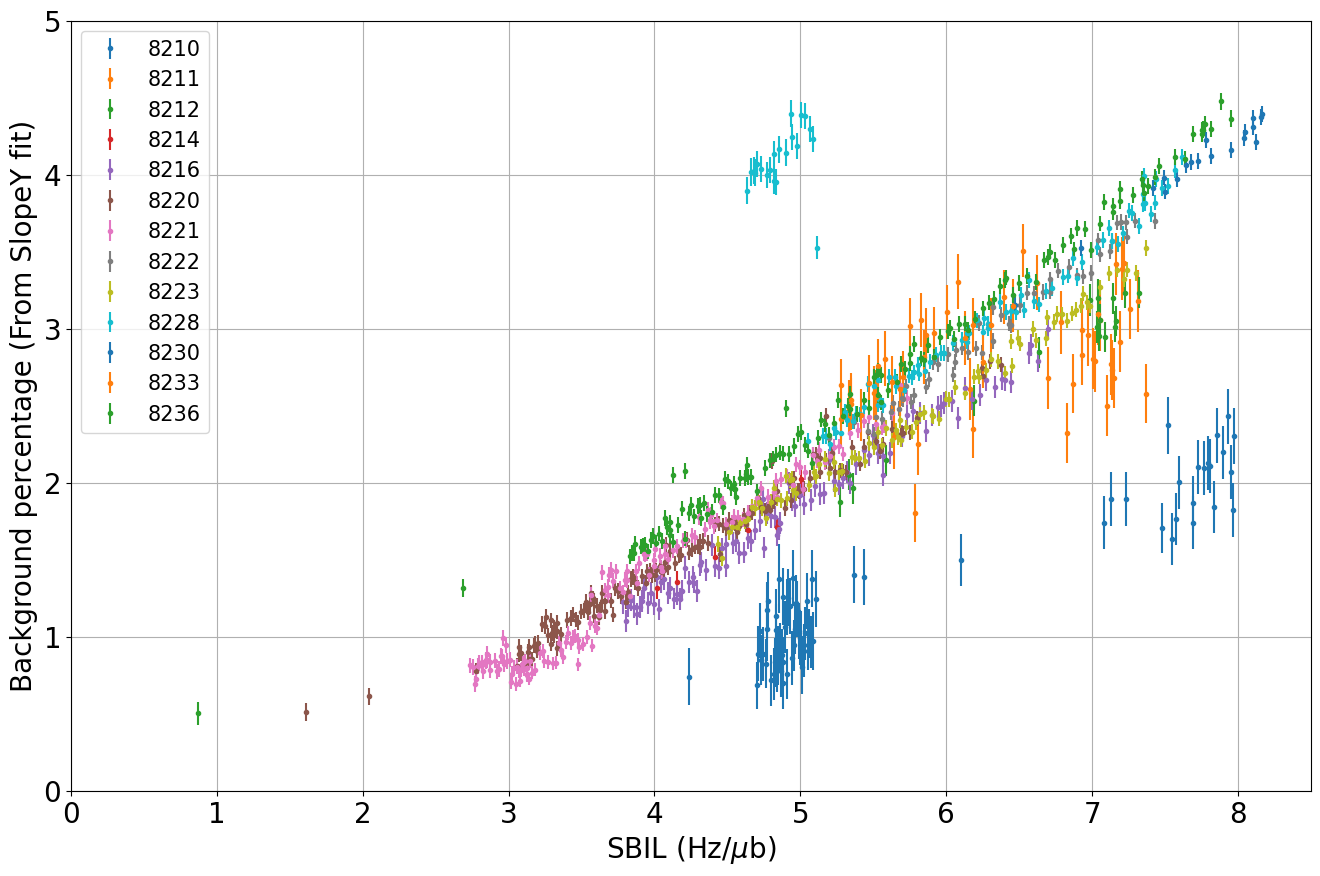

In [13]:
fills = sorted(list(set(df['fill'].values)))

for fill in fills:
    plt.errorbar(df[df['fill']==fill]['mean_sbil'], df[df['fill']==fill]['fSlopeY(%)'],xerr=None,yerr=df[df['fill']==fill]['fSlopeY_e(%)'], fmt=".")
    #plt.scatter(df[df['fill']==fill]['mean_sbil'], df[df['fill']==fill]['fSlopeY(%)'], s=markers)
    #plt.plot(df[df['fill']==fill]['mean_sbil'], df[df['fill']==fill]['fSlopeY(%)'], '-')

figure = plt.gcf()
figure.set_size_inches(16,10)
plt.legend(fills, loc=2, fontsize=legend_font)
plt.grid()
plt.xlabel("SBIL (Hz/$\mu$b)", fontsize=label_font)
plt.ylabel("Background percentage (From SlopeY fit)", fontsize=label_font)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim([0, 5])
plt.xlim([0, 8.5])

plt.savefig('fSlopeY_vs_SBIL.png', dpi=600)

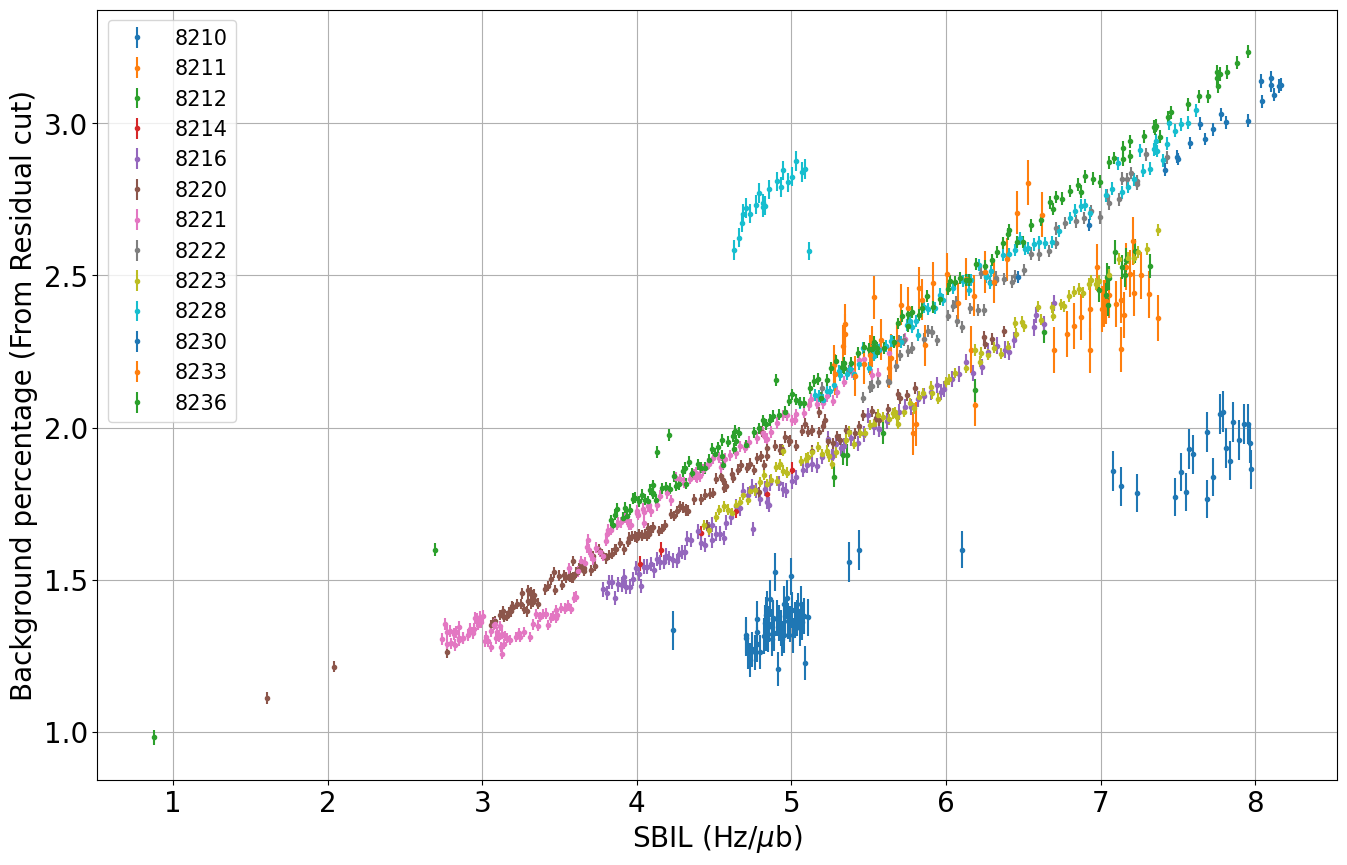

In [14]:
for fill in fills:
    plt.errorbar(df[df['fill']==fill]['mean_sbil'], df[df['fill']==fill]['fR(%)'],xerr=None,yerr=df[df['fill']==fill]['fR_e(%)'], fmt=".")
    #plt.scatter(df[df['fill']==fill]['mean_sbil'], df[df['fill']==fill]['fR(%)'], s=markers)

figure = plt.gcf()
figure.set_size_inches(16,10)
plt.legend(fills, loc=0, fontsize=legend_font)
plt.grid()
plt.xlabel("SBIL (Hz/$\mu$b)", fontsize=label_font)
plt.ylabel("Background percentage (From Residual cut)", fontsize=label_font)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('fR_vs_SBIL.png', dpi=600)

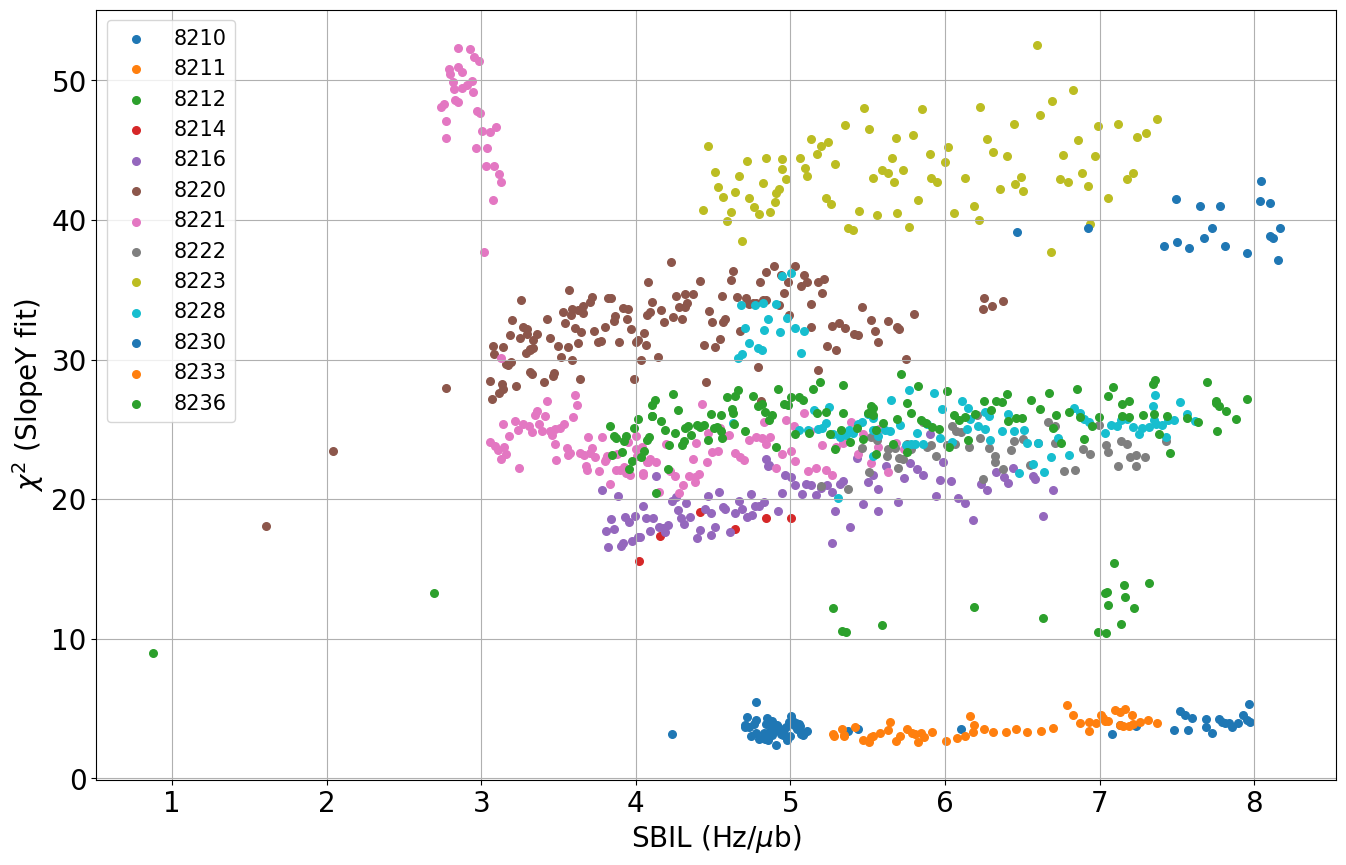

In [15]:
for fill in fills:
    #plt.errorbar(df[df['fill']==fill]['mean_sbil'], df[df['fill']==fill]['chi2'], xerr=None, yerr=df[df['fill']==fill]['chi2'])
    plt.scatter(df[df['fill']==fill]['mean_sbil'], df[df['fill']==fill]['chi2'], s=30)

figure = plt.gcf()
figure.set_size_inches(16,10)
plt.legend(fills, loc=0, fontsize=legend_font)
plt.grid()
plt.xlabel("SBIL (Hz/$\mu$b)", fontsize=label_font)
plt.ylabel("$\chi^{2}$ (SlopeY fit)", fontsize=label_font)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('chi2_vs_SBIL.png', dpi=600)

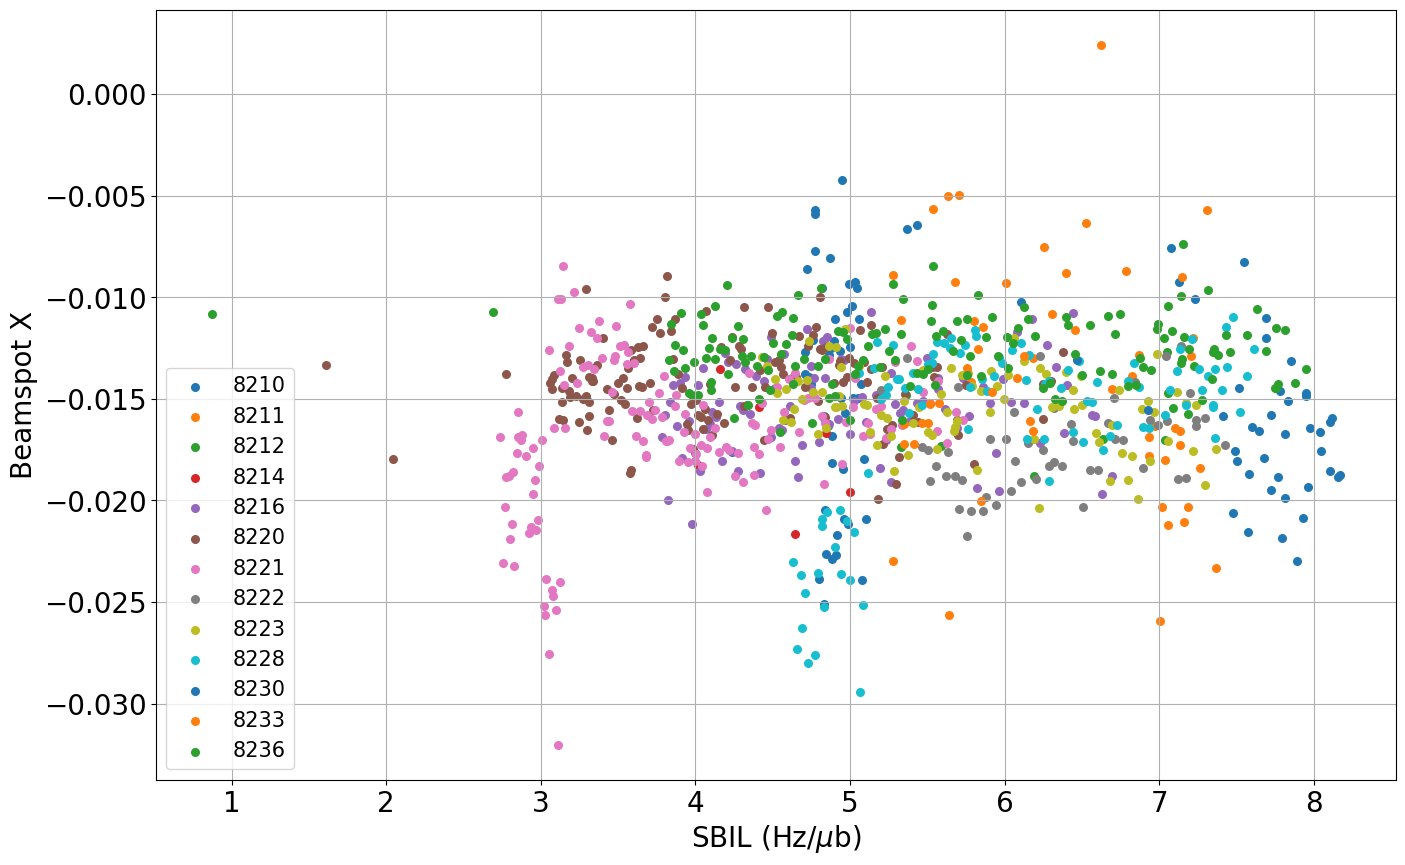

In [16]:
for fill in fills:
    plt.scatter(df[df['fill']==fill]['mean_sbil'], df[df['fill']==fill]['BS_X'], s=30)

figure = plt.gcf()
figure.set_size_inches(16,10)
plt.legend(fills, loc=0, fontsize=legend_font)
plt.grid()
plt.xlabel("SBIL (Hz/$\mu$b)", fontsize=label_font)
plt.ylabel("Beamspot X", fontsize=label_font)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('BeamspotZ_x_vs_SBIL.png', dpi=600)

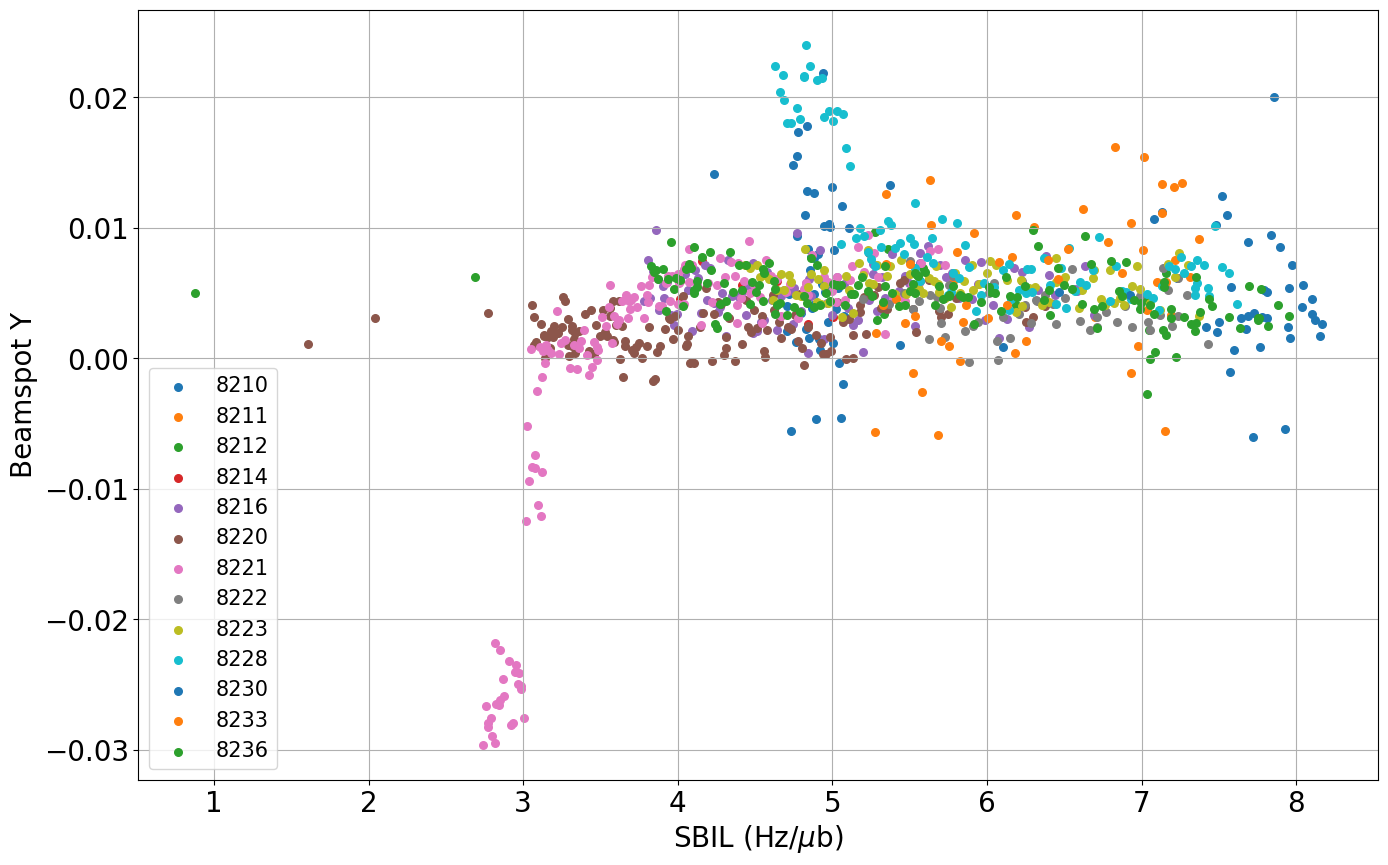

In [17]:
for fill in fills:
    plt.scatter(df[df['fill']==fill]['mean_sbil'], df[df['fill']==fill]['BS_Y'], s=30)

figure = plt.gcf()
figure.set_size_inches(16,10)
plt.legend(fills, loc=0, fontsize=legend_font)
plt.grid()
plt.xlabel("SBIL (Hz/$\mu$b)", fontsize=label_font)
plt.ylabel("Beamspot Y", fontsize=label_font)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('BeamspotZ_y_vs_SBIL.png', dpi=600)

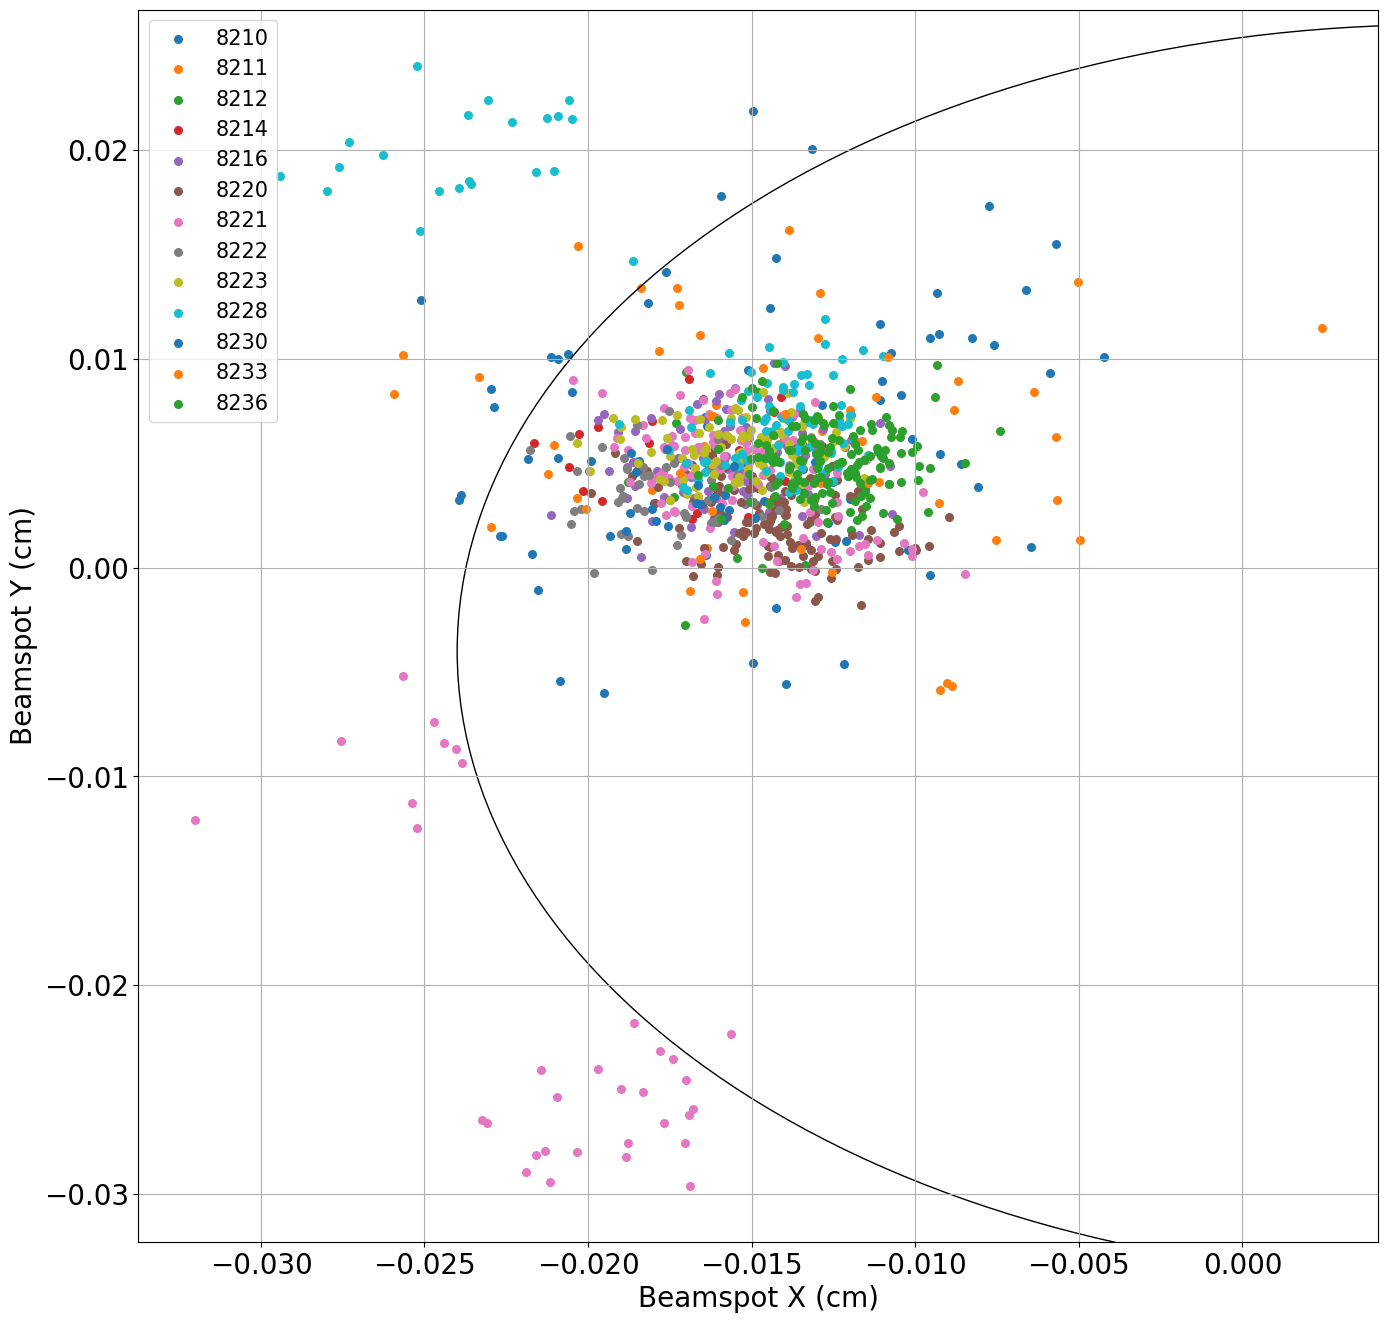

In [18]:
for fill in fills:
    plt.scatter(df[df['fill']==fill]['BS_X'], df[df['fill']==fill]['BS_Y'], s=30)



figure = plt.gcf()
figure.set_size_inches(16,16)
plt.legend(fills, loc=0, fontsize=legend_font)
plt.grid()
plt.xlabel("Beamspot X (cm)", fontsize=label_font)
plt.ylabel("Beamspot Y (cm)", fontsize=label_font)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

circle1 = plt.Circle((0.006, -0.004), 0.03, fill=False)
ax = figure.gca()
ax.add_patch(circle1)

plt.savefig('Beamspot.png', dpi=600)

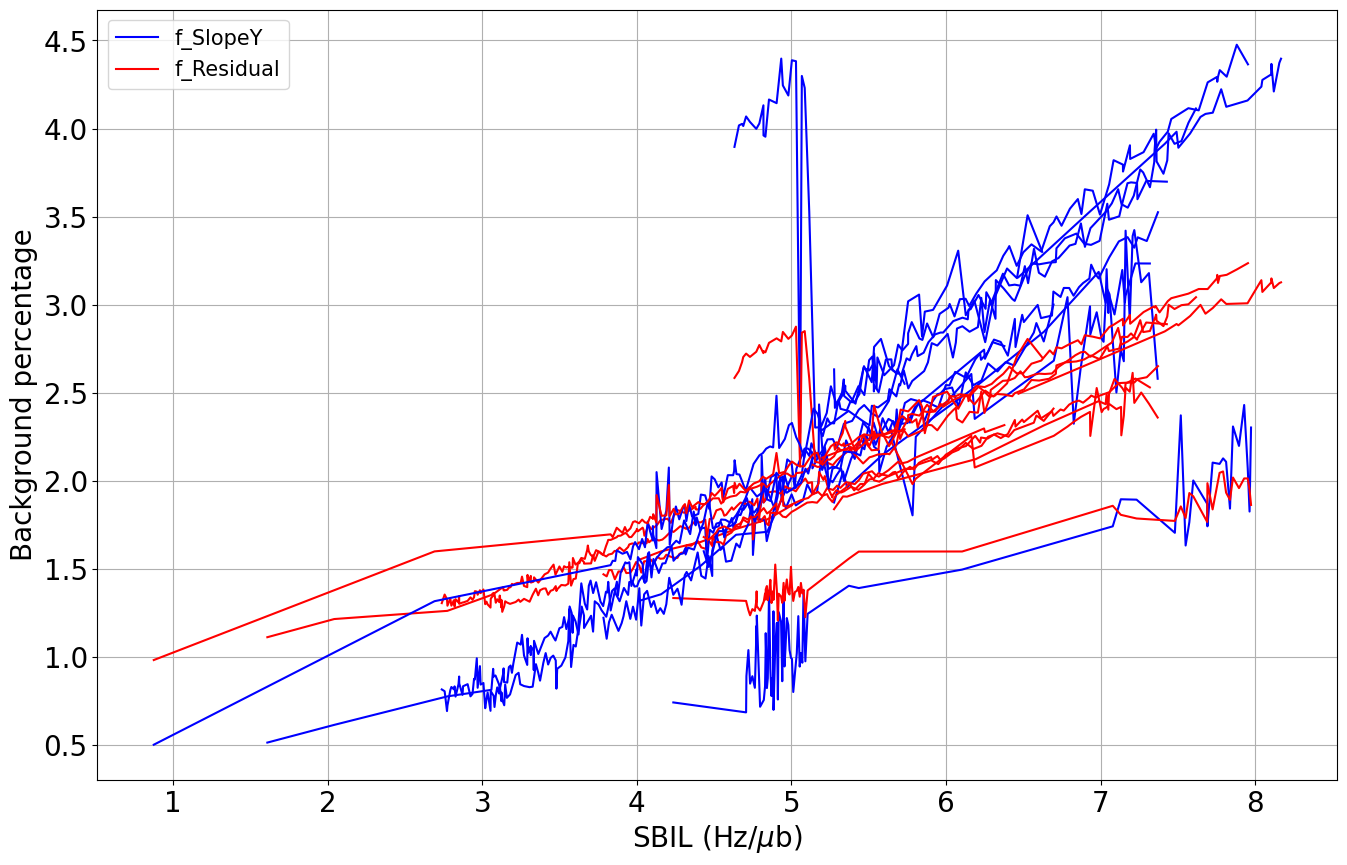

In [19]:
for fill in fills:
    plt.plot(df[df['fill']==fill]['mean_sbil'], df[df['fill']==fill]['fSlopeY(%)'], '-b')
    plt.plot(df[df['fill']==fill]['mean_sbil'], df[df['fill']==fill]['fR(%)'], '-r')
    
#plt.scatter(df['mean_sbil'], df['fSlopeY(%)'], s=markers)
#plt.scatter(df['mean_sbil'], df['fR(%)'], s=markers)
#plt.plot(df['mean_sbil'], df['fSlopeY(%)'], '-')

figure = plt.gcf()
figure.set_size_inches(16,10)
plt.legend(["f_SlopeY","f_Residual"], loc=2, fontsize=legend_font)
plt.grid()
plt.xlabel("SBIL (Hz/$\mu$b)", fontsize=label_font)
plt.ylabel("Background percentage", fontsize=label_font)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('fR_and_fS_vs_SBIL.png', dpi=600)

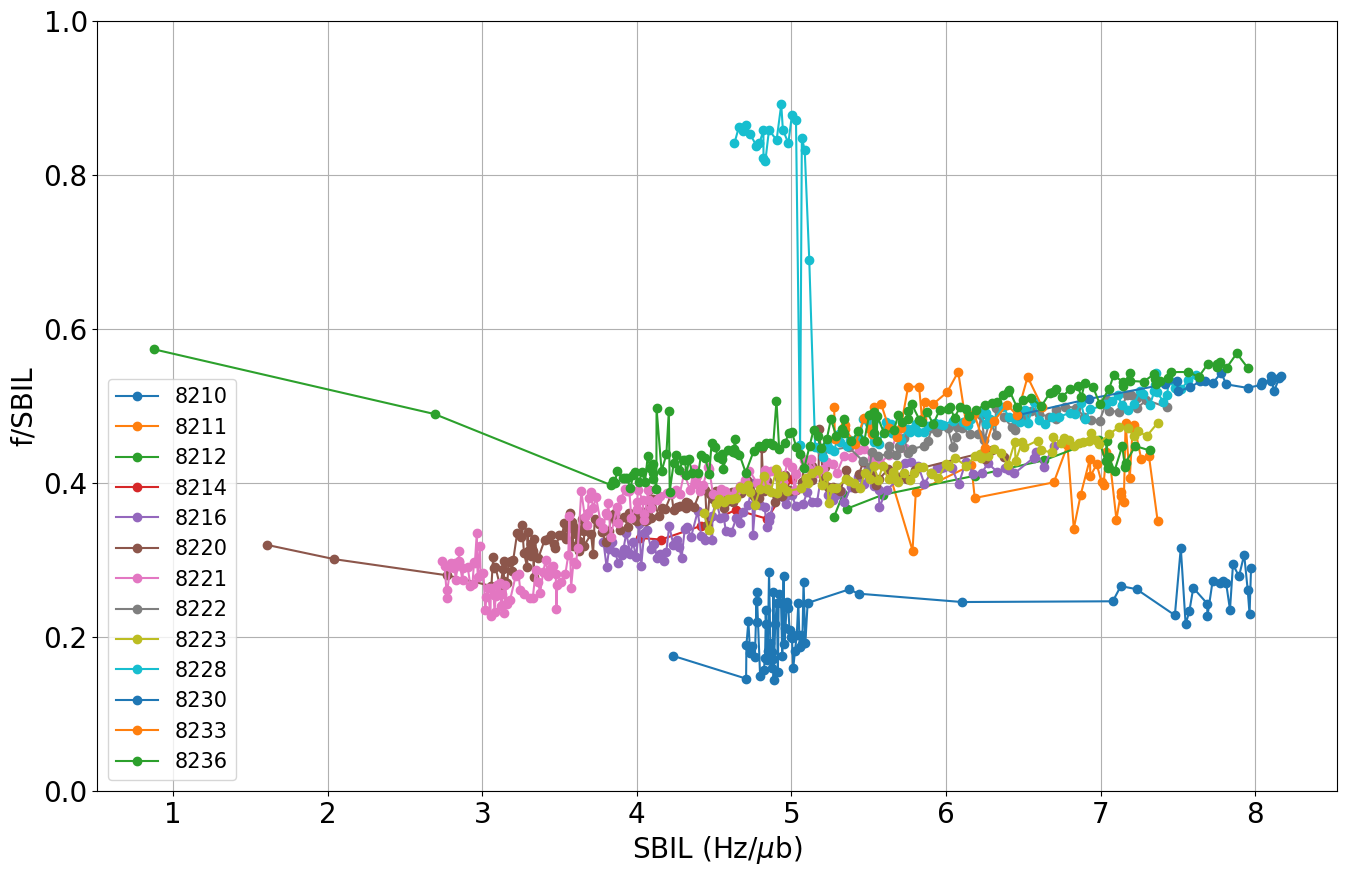

In [20]:
for fill in fills:
    plt.plot(df[df['fill']==fill]['mean_sbil'], df[df['fill']==fill]['fSlopeY(%)']/df[df['fill']==fill]['mean_sbil'], '-o')
    

figure = plt.gcf()
figure.set_size_inches(16, 10)
plt.legend(fills, loc=0, fontsize=legend_font)
#plt.legend(["f_SlopeY","f_Residual"], loc=2, fontsize=legend_font)
plt.grid()
plt.xlabel("SBIL (Hz/$\mu$b)", fontsize=label_font)
plt.ylabel("f/SBIL", fontsize=label_font)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim([0,1])

plt.savefig('rate_vs_SBIL.png', dpi=600)